Priority Queues
===============



## Agenda



1.  Motives
2.  Naive implementation
3.  Heaps
    -   Mechanics
    -   Implementation
    -   Run-time Analysis

4.  Heapsort



## 1.  Motives



## 1.  Naive implementation



In [1]:
class PriorityQueue:
    def __init__(self):
        self.data = []

    def add(self, x):
        self.data.append(x)
        self.data = sorted(self.data)

    def max(self):
        return self.data[-1]

    def pop_max(self):
        m = self.data[-1]
        del self.data[-1]
        return m

    def __bool__(self):
        return len(self.data) > 0

    def __len__(self):
        return len(self.data)

    def __repr__(self):
        return repr(self.data)

In [2]:
pq = PriorityQueue()

In [3]:
import random
for _ in range(10):
    pq.add(random.randrange(100))

In [4]:
pq

[30, 30, 41, 50, 51, 54, 54, 58, 84, 90]

In [5]:
while pq:
    print(pq.pop_max())

90
84
58
54
54
51
50
41
30
30


## 1.  Heaps



### Mechanics



### Implementation



In [6]:
class Heap:
    def __init__(self):
        self.data = []

    @staticmethod
    def parent(n):
        return (n - 1) // 2

    @staticmethod
    def left_child(n):
        return 2 * n + 1

    @staticmethod
    def right_child(n):
        return 2 * n + 2

    def pos_exists(self, n):
        return n < len(self)

    def switch_node(self, parent, child):
        parentval = self.data[parent]
        childval = self.data[child]
        self.data[parent] = childval
        self.data[child] = parentval

    def trickle_down(self, n):
        lc = Heap.left_child(n)
        rc = Heap.right_child(n)
        curval = self.data[n]
        #print(f" pos={n}:{curval} with heap {self}")
        if self.pos_exists(lc):
            if self.pos_exists(rc):
                lcval = self.data[lc]
                rcval = self.data[rc]
                #print(f"node {n}:{curval} with left: {lc}:{lcval} and  right: {rc}:{rcval}")
                if lcval > curval or rcval > curval:
                    if lcval > rcval:
                        #print("switch with left")
                        self.switch_node(n, lc)
                        self.trickle_down(lc)
                    else:
                        #print("switch with right")
                        self.switch_node(n, rc)
                        self.trickle_down(rc)
            else:
                lcval = self.data[lc]
                #print(f"node {n}:{curval} with left: {lc}:{lcval}")
                if lcval > curval:
                    #print("switch with left")
                    self.switch_node(n, lc)
                    self.trickle_down(lc)
        elif self.pos_exists(rc):
            rcval = self.data[rc]
            #print(f"node {n}:{curval} with right: {rc}:{rcval}")
            if rcval > curval:
                #print("switch with right")
                self.switch_node(n, rc)
                self.trickle_down(rc)

    def trickle_up(self, n):
        if n > 0:
            p = Heap.parent(n)
            pval = self.data[p]
            curval = self.data[n]
            if pval < curval:
                self.switch_node(p,n)
                self.trickle_up(p)

    def add(self, x): # O(log n)
        self.data.append(x)
        self.trickle_up(len(self.data) - 1)

    def max(self): # O(1)
        self.data[0]

    def pop_max(self): # O(log n)
        m = self.data[0]
        self.data[0] = self.data[-1]
        del self.data[-1]
        if len(self.data) > 0:
            self.trickle_down(0)
        return m

    def check_heap(self, pos):
        v = self.data[pos]
        lc = Heap.left_child(pos)
        rc = Heap.right_child(pos)
        #print(f"check {pos} of {len(self)} -> [{lc},{rc}]")
        if self.pos_exists(lc):
            lv = self.data[lc]
            if v < lv:
                #print(f"left child is {lv} of node with {v}@{pos}")
                return False
            self.check_heap(lc)
        if self.pos_exists(rc):
            rv = self.data[rc]
            if v < rv:
                #print(f"right child is {rv} of node with {v}@{pos}")
                return False
            self.check_heap(rc)
        return True

    def __bool__(self):
        return len(self.data) > 0

    def __len__(self):
        return len(self.data)

    def __repr__(self):
        return repr(self.data)

In [2]:
h = Heap()

In [3]:
import random
for _ in range(10):
    h.add(random.randrange(100))

In [4]:
h

[90, 83, 74, 46, 38, 38, 55, 6, 37, 0]

In [5]:
while h:
    print(h.pop_max()) ### this is a semi-efficient sorting algorithm O(n log n)

90
83
74
55
46
38
38
37
6
0


### Run-time Analysis



## 1.  Heapsort



In [11]:
def heapsort(iterable):
    heap = Heap()
    for i in iterable:
        heap.add(i)
    s = [None] * len(heap)
    for i in range(-1, -1 * len(s) -1, -1):
        s[i] = heap.pop_max()
    return s

In [12]:
import random

def pairs(iterable):
    it = iter(iterable)
    a = next(it)
    while True:
        b = next(it)
        yield a,b
        a = b

lst = heapsort(random.random() for _ in range(1000))
all((a <= b) for a, b in pairs(lst))

RuntimeError: generator raised StopIteration

In [13]:
import timeit
def time_heapsort(n):
    return timeit.timeit('heapsort(rlst)',
                         'from __main__ import heapsort; '
                         'import random; '
                         'rlst = (random.random() for _ in range({}))'.format(n),
                         number=1000)

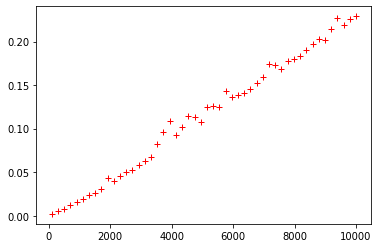

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

ns = np.linspace(100, 10000, 50, dtype=np.int_)
plt.plot(ns, [time_heapsort(n) for n in ns], 'r+')
plt.show()

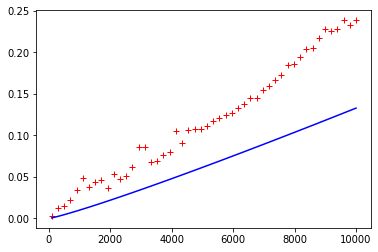

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

ns = np.linspace(100, 10000, 50, dtype=np.int_)
plt.plot(ns, [time_heapsort(n) for n in ns], 'r+')
plt.plot(ns, ns*np.log2(ns)*0.01/10000, 'b') # O(n log n) plot
plt.show()